In [1]:
# Compare alpha between different fitting methods


In [1]:
import h5py
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
#from mpl_toolkits.axisartist.
from matplotlib.collections import LineCollection

from glob import glob

/home/suntans/.conda/envs/soda/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
%matplotlib inline


In [3]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize':'large'})

In [4]:
datadir = '../../run_ddcurves/DATA_SHELL/'

ncfiles = [
     '%s/ShellCrux_Filtered_Density_BHM_MCMC_20162017_nliw.nc'%datadir,
    '%s/ShellCrux_Filtered_Density_BHM_VI_20162017_nliw.nc'%datadir,
    '%s/ShellCrux_Uniltered_Density_BHM_VI_20162017_nliw.nc'%datadir,
    '../inputs/Crux_KP150_12mth_Density_lowpass_nliw.nc',
]
colors = [
        'm',
        'c',
        'orange',
        '0.5']
labels = [
        'Filtered - MCMC', 
        'Filtered - VI',
        'Unfiltered - VI', 
        'Original']

toffsets = [
    0,
    0,
    0,
    0,
    #np.timedelta64(1,'D'),
    #np.timedelta64(1,'D'),
]

In [20]:
ds = xr.open_dataset(ncfiles[0])
betas = ds.sel(time='2017-03-29',method='nearest').beta.mean(axis=-1).values

rho_std = 1.5
z_std = 100.
rho_mu = 1024.
betas[0] = betas[0]*rho_std + rho_mu
betas[1] *= rho_std
betas[2] *= z_std
betas[3] *= z_std
betas[4] *= z_std
betas[5] *= z_std

betas.ravel().T.tolist()

[1023.6834358117951,
 1.2249066117658955,
 156.78804559089772,
 53.66835548728355,
 73.14183287436342,
 40.21031777315428]

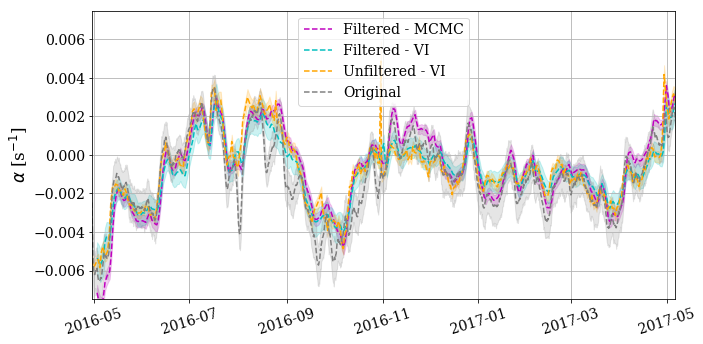

In [5]:
plt.figure(figsize=(10,5))
ps = []
for ii, ncfile in enumerate(ncfiles):
    
    ds = xr.open_dataset(ncfile)
    
    alpha_min = np.percentile(ds.alpha,5,axis=1)
    alpha_max = np.percentile(ds.alpha,95,axis=1)
    alpha_50 = np.median(ds.alpha, axis=1)
    
    toffset = toffsets[ii]
    plt.fill_between(ds.time.values+toffset, alpha_min, alpha_max, color=colors[ii],alpha=0.2)
    p1,=plt.plot(ds.time.values+toffset,alpha_50,'--',color=colors[ii], lw=1.5)
    ps.append(p1)
    #plt.xlim(200,300)
    plt.ylabel(r'$\alpha$ [s$^{-1}$]')
    plt.ylim(-0.0075, 0.0075)
    #ax2.set_xticklabels([])
    #plt.xlabel('time [days]')
    plt.grid(b=True)
    plt.xlim(ds.time.values[0],ds.time.values[-1])

plt.xticks(rotation=17)
plt.legend(ps, labels)
plt.tight_layout()

plt.savefig('../FIGURES/alpha_mcmc_comparison.png',dpi=150)
plt.savefig('../FIGURES/alpha_mcmc_comparison.pdf',dpi=150)

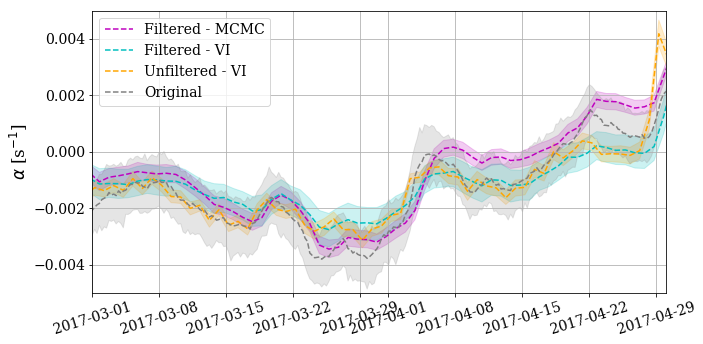

In [39]:
plt.figure(figsize=(10,5))
ps = []
for ii, ncfile in enumerate(ncfiles):
    
    ds = xr.open_dataset(ncfile)
    
    alpha_min = np.percentile(ds.alpha,5,axis=1)
    alpha_max = np.percentile(ds.alpha,95,axis=1)
    alpha_50 = np.median(ds.alpha, axis=1)
    
    toffset = toffsets[ii]
    plt.fill_between(ds.time.values+toffset, alpha_min, alpha_max, color=colors[ii],alpha=0.2)
    p1,=plt.plot(ds.time.values+toffset,alpha_50,'--',color=colors[ii], lw=1.5)

    ps.append(p1)
    #plt.xlim(200,300)
    plt.ylabel(r'$\alpha$ [s$^{-1}$]')
    plt.ylim(-0.005, 0.005)
    #ax2.set_xticklabels([])
    #plt.xlabel('time [days]')
    plt.grid(b=True)
    plt.xlim(datetime(2017,3,1), datetime(2017,4,30))

plt.xticks(rotation=17)
plt.legend(ps, labels)
plt.tight_layout()

plt.savefig('../FIGURES/alpha_mcmc_comparison_MarApr2017.png',dpi=150)
plt.savefig('../FIGURES/alpha_mcmc_comparison_MarApr2017.pdf',dpi=150)

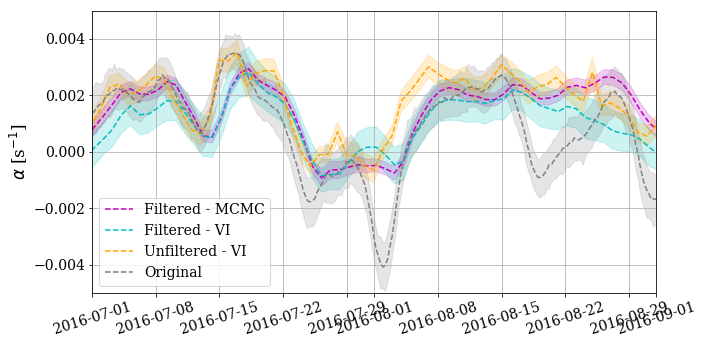

In [34]:
plt.figure(figsize=(10,5))
ps = []
for ii, ncfile in enumerate(ncfiles):
    
    ds = xr.open_dataset(ncfile)
    
    alpha_min = np.percentile(ds.alpha,5,axis=1)
    alpha_max = np.percentile(ds.alpha,95,axis=1)
    alpha_50 = np.median(ds.alpha, axis=1)

    toffset = toffsets[ii]
    plt.fill_between(ds.time.values+toffset, alpha_min, alpha_max, color=colors[ii],alpha=0.2)
    p1,=plt.plot(ds.time.values+toffset,alpha_50,'--',color=colors[ii], lw=1.5)
    ps.append(p1)
    #plt.xlim(200,300)
    plt.ylabel(r'$\alpha$ [s$^{-1}$]')
    plt.ylim(-0.005, 0.005)
    #ax2.set_xticklabels([])
    #plt.xlabel('time [days]')
    plt.grid(b=True)
    plt.xlim(datetime(2016,7,1), datetime(2016,9,1))

plt.xticks(rotation=17)
plt.legend(ps, labels)
plt.tight_layout()

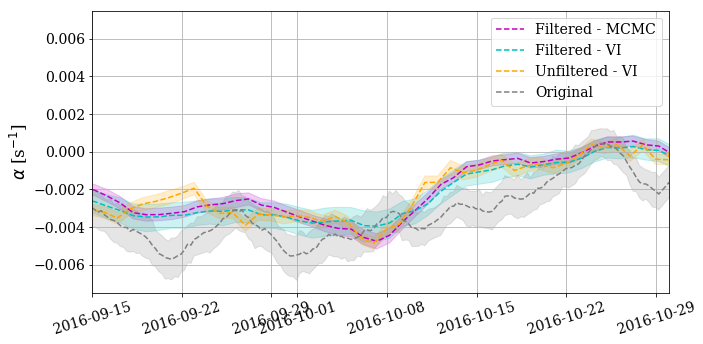

In [35]:
plt.figure(figsize=(10,5))
ps = []
for ii, ncfile in enumerate(ncfiles):
    
    ds = xr.open_dataset(ncfile)
    
    alpha_min = np.percentile(ds.alpha,5,axis=1)
    alpha_max = np.percentile(ds.alpha,95,axis=1)
    alpha_50 = np.median(ds.alpha, axis=1)

    toffset = toffsets[ii]
    plt.fill_between(ds.time.values+toffset, alpha_min, alpha_max, color=colors[ii],alpha=0.2)
    p1,=plt.plot(ds.time.values+toffset,alpha_50,'--',color=colors[ii], lw=1.5)
    ps.append(p1)
    #plt.xlim(200,300)
    plt.ylabel(r'$\alpha$ [s$^{-1}$]')
    plt.ylim(-0.0075, 0.0075)
    #ax2.set_xticklabels([])
    #plt.xlabel('time [days]')
    plt.grid(b=True)

plt.xlim(datetime(2016,9,15), datetime(2016,10,30))

plt.xticks(rotation=17)

plt.legend(ps, labels)
plt.tight_layout()